#  <center><u>LINEAR REGRESSION<u><center>


Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised learning Regression problems where we try to predict a continuous variable.

`Problem Statement`:
Build a model which predicts sales based on the money spent on different platforms for marketing.

In [1]:
# Import necessary libraries numpy as np, pandas as pd, pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data

df = pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#drop radio and newspaper column
df = df.drop(["Radio","Newspaper"],axis=1)

In [5]:
# View the dimensions of df

df.shape

(200, 2)

In [6]:
# View the top 5 rows of df
df.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [7]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
# View descriptive statistics

df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [9]:
# Declare feature variable and target variable
X = df.loc[:,["TV"]]

y = df.loc[:,["Sales"]]


In [10]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [11]:
#### or
X=df["TV"].values
y=df["Sales"].values

In [12]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

## Visual exploratory data analysis

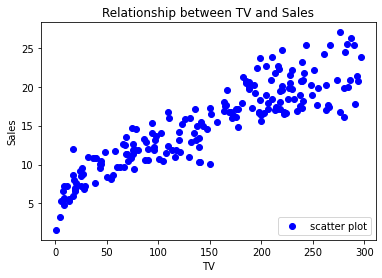

In [13]:
# Plot scatter plot between X and y

plt.scatter(X,y,color="blue",label="scatter plot")
plt.title("Relationship between TV and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend(loc=4)
plt.show()

The above graph shows some sort of relationship between sales and TV. It shows positive linear relation i.e when As TV's value increases sales increases and vise-versa.

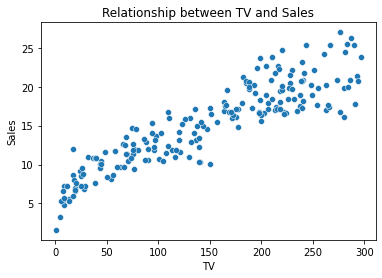

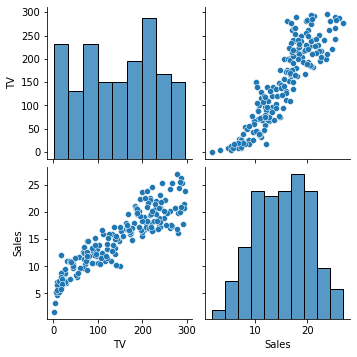

In [14]:
# Visualise the relationship between the features and the response using scatterplots

sns.scatterplot(data=df,x="TV",y="Sales")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales")
plt.show()

# ploting a pairplot also for df

sns.pairplot(df)



In [15]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(200,)
(200,)


In [16]:
X

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [17]:
# Reshape X and y

X = X.reshape(-1,1)

y = y.reshape(-1,1)



In [18]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [19]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.


In [20]:
# import train test split

from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
# print shapes of X_train,y_train, X_test, y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [22]:
# Fit the linear model
from sklearn.linear_model import LinearRegression
# Instantiate the linear regression object lm

lm = LinearRegression()

# Train the model using training data sets

lm.fit(X_train,y_train)


# Predict on the test data
y_pred =lm.predict(X_test)

In [23]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_

# also print a and b
print("Estimated model slope, a:",a)
print("Estimated model intercept,b:",b)

Estimated model slope, a: [[0.05483488]]
Estimated model intercept,b: [7.20655455]


In [24]:
# Predicting Sales values on first five 5 TV  datasets only

lm.predict(X)[0:5]

array([[19.82406131],
       [ 9.64670688],
       [ 8.14971455],
       [15.51403944],
       [17.12070154]])

In [25]:
# prediction for all X present in the dataset

lm.predict(X)


array([[19.82406131],
       [ 9.64670688],
       [ 8.14971455],
       [15.51403944],
       [17.12070154],
       [ 7.68361804],
       [10.35956037],
       [13.79770758],
       [ 7.67813455],
       [18.16256433],
       [10.83114037],
       [18.9796041 ],
       [ 8.51162478],
       [12.55295572],
       [18.39835433],
       [17.92129084],
       [10.92435967],
       [22.63709085],
       [11.00112851],
       [15.28373293],
       [19.18249317],
       [20.22435596],
       [ 7.93037501],
       [19.72535852],
       [10.62276781],
       [21.6226455 ],
       [15.04245944],
       [20.37241015],
       [20.84947364],
       [11.07789734],
       [23.26769201],
       [13.39741293],
       [12.53650525],
       [21.77069968],
       [12.45425293],
       [23.14705527],
       [21.84198503],
       [11.30272037],
       [ 9.56993804],
       [19.70890805],
       [18.31061852],
       [16.91232898],
       [23.30607643],
       [18.55189201],
       [ 8.58291013],
       [16

In [26]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("RMSE value: {:.4f}" .format(rmse))


RMSE value: 2.2759


In [27]:
# Calculate and print r2_score

from sklearn.metrics import r2_score

print("R2 Score value: {:.4f}" .format(r2_score(y_test,y_pred)))


R2 Score value: 0.8149


## Interpretation and Conclusion


The RMSE value has been found to be  2.2759. It means the standard deviation for our prediction is  2.2759. which is quite less. So, the model is good fit to the data. R2 score value has been found to be  0.8149. It means that this model explains  81.49 % of the variance in dependent variable. So, the R2 score value confirms that the model is good enough to deploy because it provides good fit to the data.

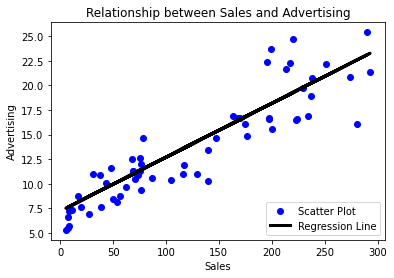

In [28]:
# Plot the Regression Line between X and Y as shown in below output.

plt.scatter(X_test,y_test,color="blue",label="Scatter Plot")
plt.plot(X_test,y_pred,color="black",linewidth=3,label="Regression Line")
plt.xlabel("Sales")
plt.ylabel("Advertising")
plt.title("Relationship between Sales and Advertising")
plt.legend(loc=4)


In [30]:
# Train score and Test score

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.7996
Test set score: 0.8149
